In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
thl = pd.read_csv('./datasets/thl_covid19.csv', sep=";")
thl

,Mittari,Aika,val
0,Tapausten lukumäärä,Vuosi 2020 Viikko 06,1.0
1,Testausmäärä,Vuosi 2020 Viikko 06,NaN
2,Koronaan ajallisesti liittyvät kuolemat (30 vr...,Vuosi 2020 Viikko 06,NaN
3,"Koronasta johtuvat kuolemat, kuolintodistus (a...",Vuosi 2020 Viikko 06,NaN
4,Kuolemat joissa korona myötävaikuttavana tekij...,Vuosi 2020 Viikko 06,NaN
...,...,...,...
1120,Tapausten lukumäärä,Kaikki ajat,1516711.0
1121,Testausmäärä,Kaikki ajat,12108977.0
1122,Koronaan ajallisesti liittyvät kuolemat (30 vr...,Kaikki ajat,11963.0
1123,"Koronasta johtuvat kuolemat, kuolintodistus (a...",Kaikki ajat,7303.0


In [3]:
thl2 = thl.pivot(index="Aika", columns="Mittari", values="val")
thl2

Mittari,"Koronaan ajallisesti liittyvät kuolemat (30 vrk), tartuntatautirekisteri","Koronasta johtuvat kuolemat, kuolintodistus (alustava tieto)","Kuolemat joissa korona myötävaikuttavana tekijänä, kuolintodistus (alustava tieto)",Tapausten lukumäärä,Testausmäärä
Aika,,,,,
Kaikki ajat,11963.0,7303.0,4403.0,1516711.0,12108977.0
Vuosi 2020 Viikko 06,NaN,NaN,NaN,1.0,NaN
Vuosi 2020 Viikko 07,NaN,NaN,NaN,0.0,NaN
Vuosi 2020 Viikko 08,NaN,NaN,NaN,1.0,NaN
Vuosi 2020 Viikko 09,NaN,NaN,NaN,7.0,415.0
...,...,...,...,...,...
Vuosi 2024 Viikko 16,0.0,0.0,2.0,67.0,0.0
Vuosi 2024 Viikko 17,0.0,1.0,4.0,100.0,0.0
Vuosi 2024 Viikko 18,0.0,0.0,0.0,95.0,0.0


In [4]:
thl2 = thl2.drop("Kaikki ajat")
thl2 = thl2.fillna(0)

array([<AxesSubplot:xlabel='Aika'>, <AxesSubplot:xlabel='Aika'>,
       <AxesSubplot:xlabel='Aika'>, <AxesSubplot:xlabel='Aika'>,
       <AxesSubplot:xlabel='Aika'>], dtype=object)

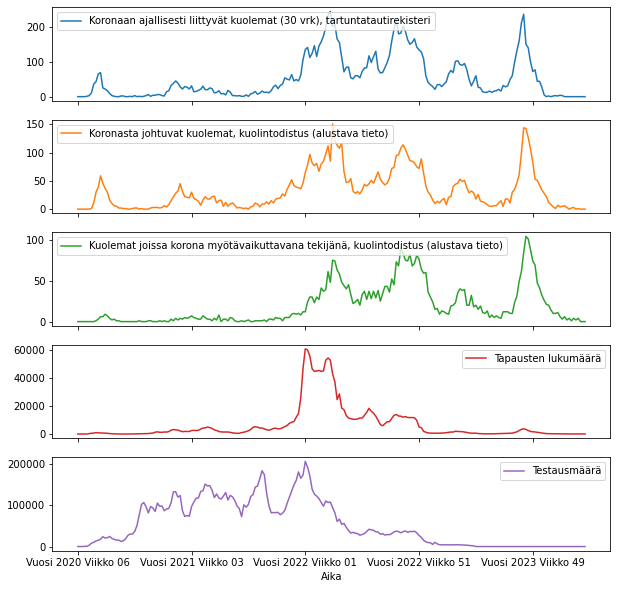

In [5]:
thl2.plot(subplots=True, figsize=(10,10))

In [6]:
thl2.to_csv('./datasets/preprocessed/thl_covid19_weekly.csv', index=False)

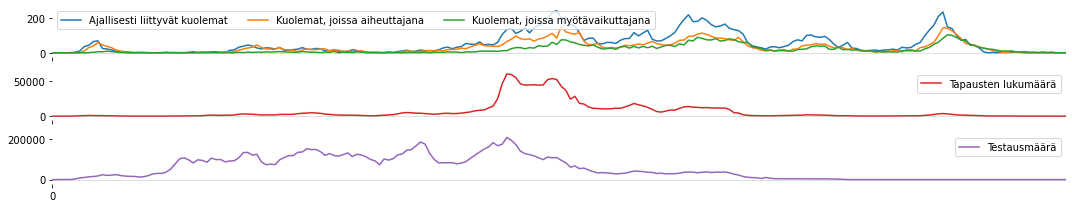

In [14]:
from datasets.plots import plot_datasets2
thl2.columns = list(["Ajallisesti liittyvät kuolemat", "Kuolemat, joissa aiheuttajana", "Kuolemat, joissa myötävaikuttajana"]) + list(thl2.columns[3:])
plot_datasets2(thl2, [(0,1,2),(3,), (4,)])
plt.savefig(f"datasets/plots/thl.png", dpi=300)